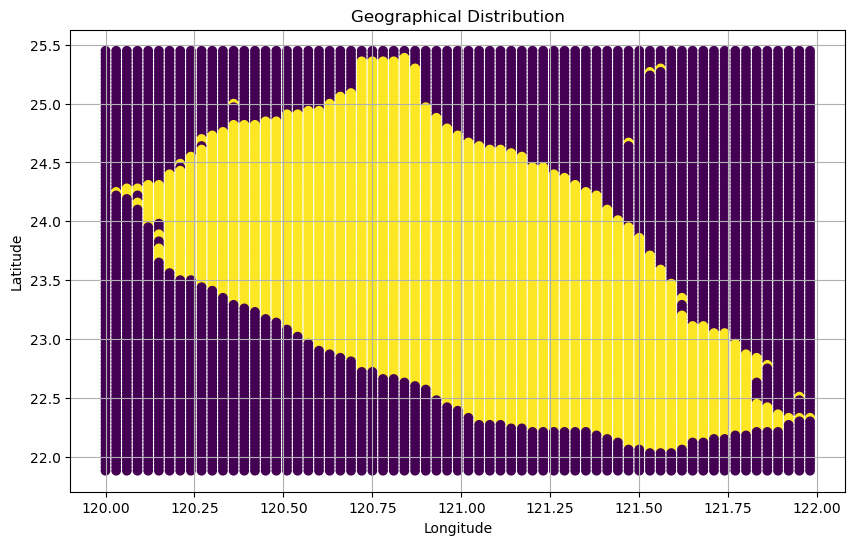

In [1]:
# Visualization of data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('classification_dataset.csv')

plt.figure(figsize=(10, 6))
plt.scatter(df['經度'], df['緯度'], c=df['label'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution')
plt.grid(True)
plt.show()

In [2]:

from sklearn.model_selection import train_test_split

df = pd.read_csv('classification_dataset.csv')
X = df[['經度', '緯度']].values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 82.52%


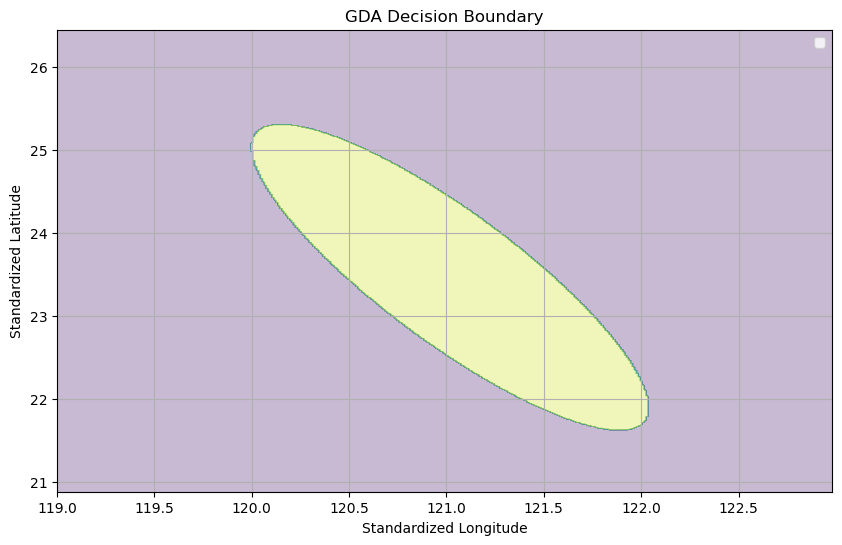

In [3]:
# Use scikit GDA to classify the data
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
gda = QuadraticDiscriminantAnalysis()
gda.fit(X_train, y_train)

y_pred = gda.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = gda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.xlabel('Standardized Longitude')
plt.ylabel('Standardized Latitude')
plt.title('GDA Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

Self-implemented GDA Accuracy: 82.52%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


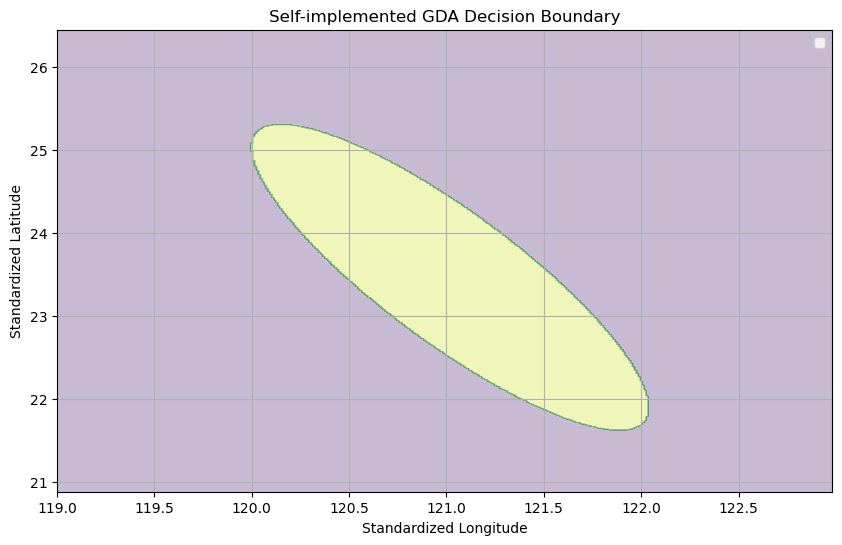

In [4]:
# Self-implemented GDA
class SelfGDA:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = {}
        self.covariances = {}
        self.priors = {}
        n_samples = X.shape[0]

        for cls in self.classes:
            X_cls = X[y == cls]
            self.means[cls] = np.mean(X_cls, axis=0)
            self.covariances[cls] = np.cov(X_cls, rowvar=False)
            self.priors[cls] = X_cls.shape[0] / n_samples

    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = {}
            for cls in self.classes:
                mean = self.means[cls]
                cov = self.covariances[cls]
                prior = self.priors[cls]
                likelihood = self._multivariate_gaussian(x, mean, cov)
                # likelihood = p(x|y=cls)
                # prior = p(y=cls)
                posteriors[cls] = likelihood * prior
            predictions.append(max(posteriors, key=posteriors.get))
        return np.array(predictions)

    def _multivariate_gaussian(self, x, mean, cov):
        size = len(x)
        det_cov = np.linalg.det(cov)
        norm_const = 1.0 / (np.power((2 * np.pi), size / 2) * np.sqrt(det_cov))
        x_mu = x - mean
        inv_cov = np.linalg.inv(cov)
        result = np.exp(-0.5 * (x_mu @ inv_cov @ x_mu.T))
        return norm_const * result

self_gda = SelfGDA()
self_gda.fit(X_train, y_train)
y_pred_self = self_gda.predict(X_test)
accuracy_self = np.mean(y_pred_self == y_test)
print(f'Self-implemented GDA Accuracy: {accuracy_self * 100:.2f}%')

# Plot the decision boundary for self-implemented GDA
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z_self = self_gda.predict(np.c_[xx.ravel(), yy.ravel()])
Z_self = Z_self.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_self, alpha=0.3)
plt.xlabel('Standardized Longitude')        
plt.ylabel('Standardized Latitude')
plt.title('Self-implemented GDA Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

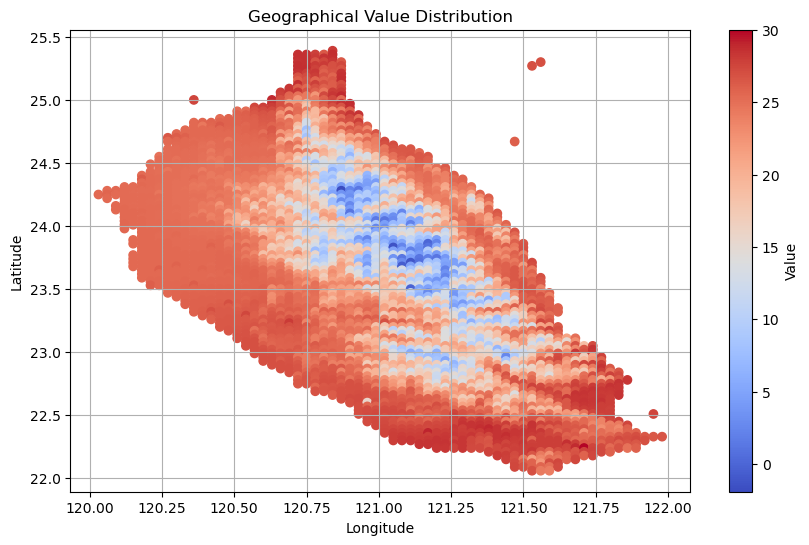

In [5]:
# Visualize regression data
df = pd.read_csv('regression_dataset.csv')
plt.figure(figsize=(10, 6))
plt.scatter(df['經度'], df['緯度'], c=df['溫度'], cmap='coolwarm')
plt.colorbar(label='Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Value Distribution')
plt.grid(True)
plt.show()

## Combine model

In [6]:
import numpy as np
    
class CombinedModel:
    def __init__(self, clf_model, reg_model):
        self.clf_model = clf_model
        self.reg_model = reg_model

    def predict(self, X):
        y_clf = self.clf_model.predict(X)
        y_reg = self.reg_model.predict(X)

        result = np.where(y_clf == 1, y_reg, -999)
        return result

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 讀入分類資料
df_cls = pd.read_csv("classification_dataset.csv") 
X_cls = df_cls[['經度', '緯度']]
y_cls = df_cls['label']

# 分割分類資料
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# 讀入迴歸資料
df_reg = pd.read_csv("regression_dataset.csv") 
X_reg = df_reg[['經度', '緯度']]
y_reg = df_reg['溫度']

# 分割迴歸資料
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
combined_model = CombinedModel(
    clf_model = RandomForestClassifier(),
    reg_model = RandomForestRegressor()
)

In [9]:
# 訓練分類模型
combined_model.clf_model.fit(X_cls_train, y_cls_train)

combined_model.clf_model.score(X_cls_test, y_cls_test)

0.9819651741293532

In [10]:
# 訓練回歸模型
combined_model.reg_model.fit(X_reg_train, y_reg_train)

combined_model.reg_model.score(X_reg_test, y_reg_test)

0.8551103275951177

In [11]:
y_combined = combined_model.predict(X_cls)

In [12]:
results = np.column_stack((X_cls, y_combined))

In [13]:
np.savetxt(" results.csv", results, delimiter=",", header="lon,lat,value", comments='')

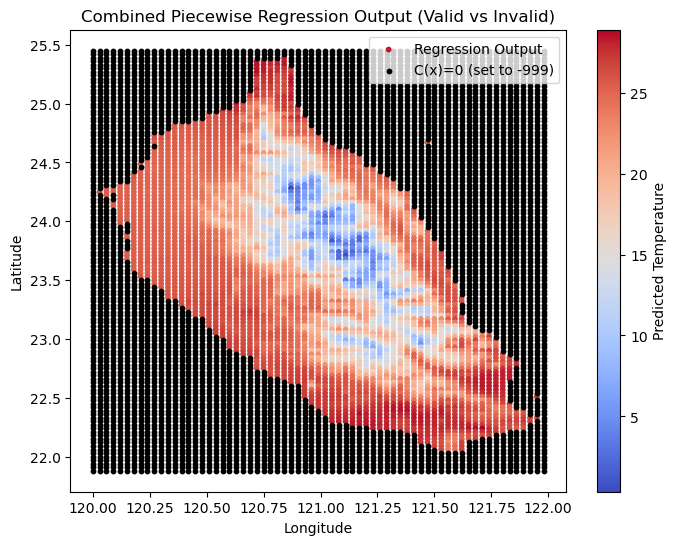

In [14]:
mask_invalid = (y_combined == -999)
mask_valid = ~mask_invalid 

plt.figure(figsize=(8, 6))

plt.scatter(results[mask_valid, 0], results[mask_valid, 1],
            c=y_combined[mask_valid], cmap='coolwarm', s=10, label="Regression Output")
plt.colorbar(label="Predicted Temperature")

# 再畫分類為 0 的區域（即 -999）
plt.scatter(results[mask_invalid, 0], results[mask_invalid, 1],
            color='black', s=10, label="C(x)=0 (set to -999)")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Combined Piecewise Regression Output (Valid vs Invalid)")
plt.legend()
plt.show()